In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('churn_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [5]:
print(df.dtypes)

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [6]:
columns_to_keep = ['Tenure', 'MonthlyCharge', 'Income']

In [7]:
df = df[columns_to_keep]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tenure         10000 non-null  float64
 1   MonthlyCharge  10000 non-null  float64
 2   Income         10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [9]:
selected_variables = [ 'Tenure','MonthlyCharge','Income']

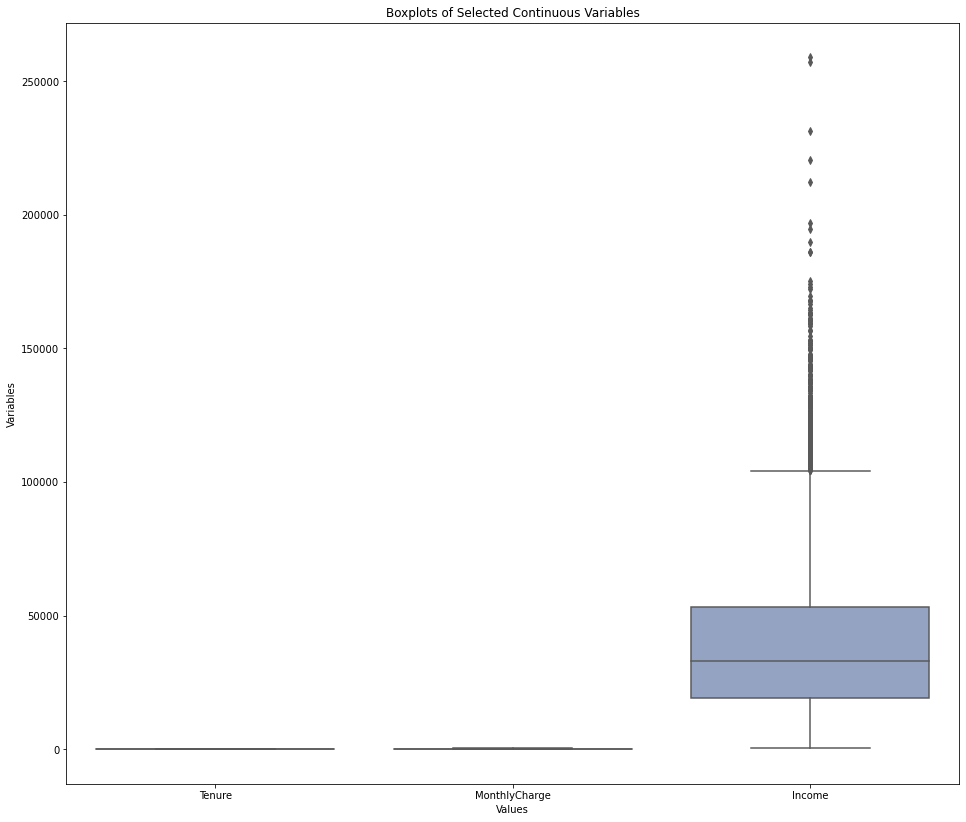

In [10]:
plt.figure(figsize=(16,14))
sns.boxplot(data=df[selected_variables], orient='v', palette='Set2')
plt.title('Boxplots of Selected Continuous Variables')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [12]:
row_count = df.count()

In [13]:
print(row_count)

Tenure           10000
MonthlyCharge    10000
Income           10000
dtype: int64


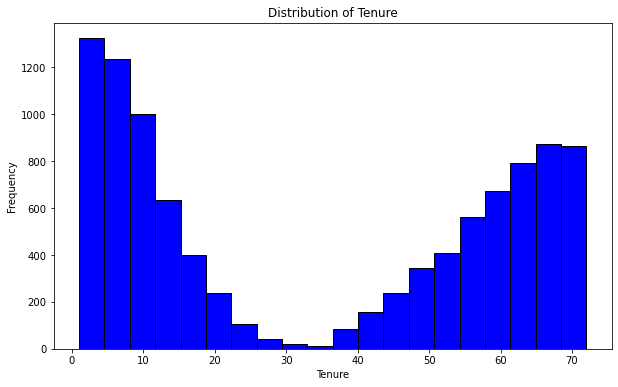

In [14]:
plt.figure(figsize=(10,6))
plt.hist(df['Tenure'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()


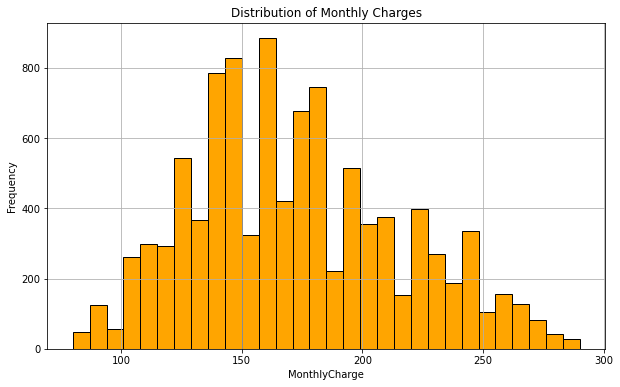

In [15]:
plt.figure(figsize=(10,6))
plt.hist(df['MonthlyCharge'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('MonthlyCharge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

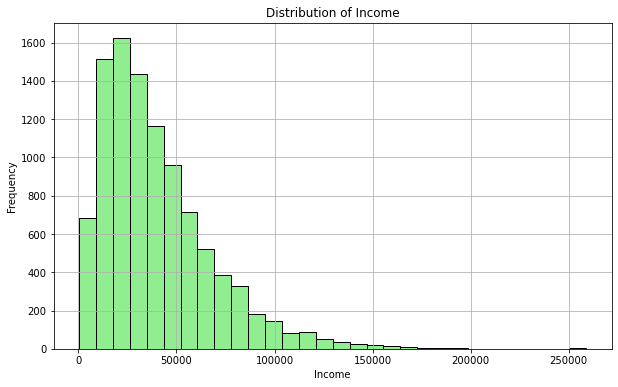

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df['Income'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

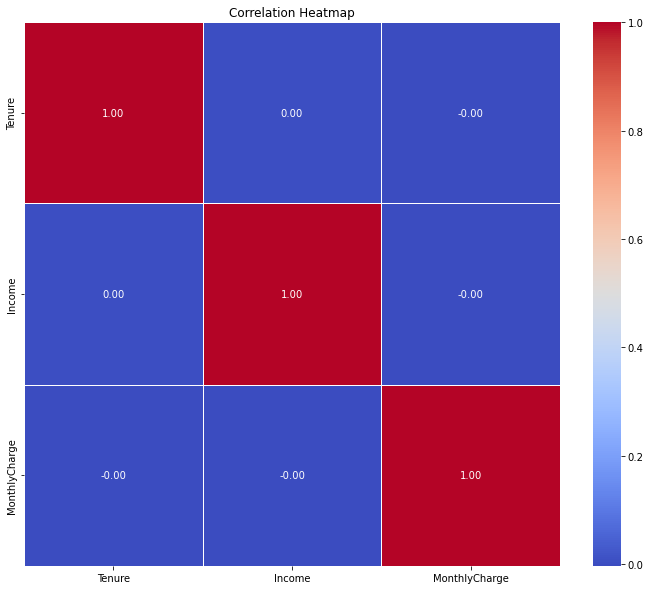

In [17]:
correlation_matrix = df[['Tenure', 'Income', 'MonthlyCharge']].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
print(df.columns)

Index(['Tenure', 'MonthlyCharge', 'Income'], dtype='object')


In [19]:
prepared_data = ['Tenure', 'Income', 'MonthlyCharge']
df_selected = df[prepared_data]

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

In [21]:
sse = []  # empty list to store SSE for different k values
for k in range(1, 11):  # Loop over k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)  # Append the inertia for each k


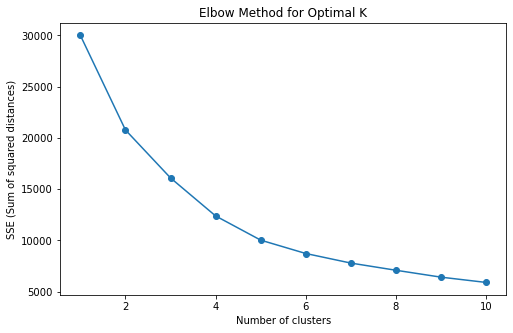

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')
plt.show()


In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [24]:
df['Cluster'] = kmeans.labels_

In [26]:
print("Cluster centers:")
print(kmeans.cluster_centers_)


Cluster centers:
[[-0.96565491 -0.33544313  0.01001569]
 [ 0.97085489 -0.32766949  0.010124  ]
 [-0.03097553  1.80331694 -0.05477235]]


In [27]:

df['Cluster'] = kmeans.labels_


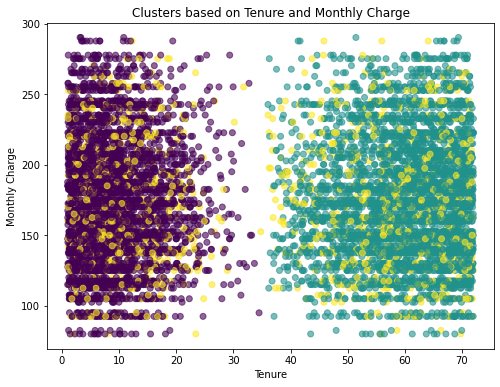

In [29]:

plt.figure(figsize=(8, 6))
plt.scatter(df['Tenure'], df['MonthlyCharge'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters based on Tenure and Monthly Charge')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charge')
plt.show()


In [36]:
df['Cluster'] = kmeans.labels_


In [37]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_  
silhouette_avg = silhouette_score(df_scaled, labels)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.3482551847377956


In [38]:
cluster_summary = df.groupby('Cluster').agg({
    'Tenure': ['mean', 'median', 'count'], 
    'MonthlyCharge': ['mean', 'median'], 
    'Income': ['mean', 'median']
})


In [39]:
print(cluster_summary)


            Tenure                  MonthlyCharge                    Income  \
              mean     median count          mean      median          mean   
Cluster                                                                       
0         8.992694   7.793483  4212    173.057594  169.937833  30364.975745   
1        60.195683  61.739555  4236    173.056744  168.711250  30557.599004   
2        33.760142  25.548785  1552    170.271399  162.483000  90676.546707   

                    
            median  
Cluster             
0        28730.495  
1        28368.645  
2        83083.805  


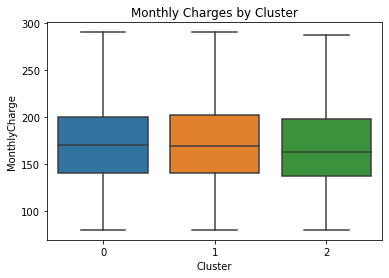

In [40]:


sns.boxplot(x='Cluster', y='MonthlyCharge', data=df)
plt.title('Monthly Charges by Cluster')
plt.show()
